# Telecom Churn Case Study

In [82]:
# Import necessary libraries
import numpy as np
import pandas as pd

# set the max columns to none
pd.set_option('display.max_columns', None)

In [83]:
# Read the data
churn_data = pd.read_csv('churn_data.csv')
customer_data = pd.read_csv('customer_data.csv')
internet_data = pd.read_csv('internet_data.csv')

In [84]:
print('Churn data')
churn_data.head()

Churn data


,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [85]:
print('Internet data')
internet_data.head()

Internet data


,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [86]:
print('Customer data')
customer_data.head()

Customer data


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [87]:
# Merge all data
df1 = pd.merge(customer_data, internet_data, how='inner', on='customerID')
data = pd.merge(churn_data, df1, how='inner', on='customerID')


# View all data

Merging on customerID as it is common in all datasets

In [88]:
data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [89]:
print('Total entries of data :',data.shape)

Total entries of data : (7043, 21)


In [90]:
data.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


Looking at all details that have numerical values. 
- Comparing the mean and 50% median we can see that they are almost the same. This is a good indicator of no outliers
- There is a steady increase in the values of percentiles. This is also a good indicator of no outliers

# Clean up data

There are a lot of columns with 'Yes' and 'No' entries. It is useful to convert them into 1 and 0, so that it can be used in the model

In [91]:
cols = ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for i in cols:
    print(data[i].value_counts())
    print()

Yes    6361
No      682
Name: PhoneService, dtype: int64

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

No     5174
Yes    1869
Name: Churn, dtype: int64

No     3641
Yes    3402
Name: Partner, dtype: int64

No     4933
Yes    2110
Name: Dependents, dtype: int64

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64



We can observe that 'No internet service' can be seen at many columns. Let us see if this info is present in the 'InternetService' column

In [92]:
print(data.InternetService.value_counts())

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


As the number is exact (1526), we don't need this info as it is present in another column already. 
So, we are going to replace 'No internet service' with 0

In [93]:
data['PhoneService'].value_counts()
data.replace('Yes', 1, inplace=True)
data.replace('No', 0, inplace=True)
data.replace('No internet service', 0, inplace=True)
data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,0,1,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,0,0,0,0,DSL,1,0,1,0,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,0,DSL,1,1,0,0,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,1,0,1,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,0,Fiber optic,0,0,0,0,0,0


In [94]:
data.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

Since there are only 2 values for gender we can also replace them as Male=1 and Female=0

In [95]:
data.replace('Male', 1, inplace=True)
data.replace('Female', 0, inplace=True)
data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,0,0,1,0,No phone service,DSL,0,1,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,1,0,0,0,0,DSL,1,0,1,0,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,0,0,0,DSL,1,1,0,0,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0,0,No phone service,DSL,1,0,1,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,0,0,0,0,0,Fiber optic,0,0,0,0,0,0


It is better to convert categorical variables using one-hot encoding

In [96]:
cols = ['Contract', 'PaymentMethod', 'MultipleLines', 'InternetService']
for i in cols:
    print(data[i].value_counts())
    print()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

0                   3390
1                   2971
No phone service     682
Name: MultipleLines, dtype: int64

Fiber optic    3096
DSL            2421
0              1526
Name: InternetService, dtype: int64



In [97]:
data.PhoneService.value_counts()

1    6361
0     682
Name: PhoneService, dtype: int64

'No phone service' can be predicted from the column 'PhoneService' as it is an exact match. So, 'No phone service' can be replaced with 0 in column 'MultipleLines'

In [98]:
data.replace('No phone service', 0, inplace=True)
data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,0,0,1,0,0,DSL,0,1,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,1,0,0,0,0,DSL,1,0,1,0,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,0,0,0,DSL,1,1,0,0,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0,0,0,DSL,1,0,1,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,0,0,0,0,0,Fiber optic,0,0,0,0,0,0


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   int64  
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   int64  
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   int64  
 9   gender            7043 non-null   int64  
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   int64  
 12  Dependents        7043 non-null   int64  
 13  MultipleLines     7043 non-null   int64  
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   int64  
 16  OnlineBackup      7043 non-null   int64  


Strangely the column 'TotalCharges' is an object and not number. But we know that they are numbers. So, convert them into numbers

In [100]:
# data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='raise')
print('The above command is commented out because it will throw and error')
data.info()

The above command is commented out because it will throw and error
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   int64  
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   int64  
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   int64  
 9   gender            7043 non-null   int64  
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   int64  
 12  Dependents        7043 non-null   int64  
 13  MultipleLines     7043 non-null   int64  
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043

Apparently there is an empty string at position 488. Convert it to 0. Let us see where these entries are

In [101]:
empties = []
for i in range(data.shape[0]):
    if data.TotalCharges[i] == ' ':
        empties.append(i)
empties

[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]

In [102]:
for i in empties:
    data.TotalCharges.iloc[i] = 0

/tmp/ipykernel_4807/1912021023.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.TotalCharges.iloc[i] = 0


In [103]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='raise')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   int64  
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   int64  
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   float64
 8   Churn             7043 non-null   int64  
 9   gender            7043 non-null   int64  
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   int64  
 12  Dependents        7043 non-null   int64  
 13  MultipleLines     7043 non-null   int64  
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   int64  
 16  OnlineBackup      7043 non-null   int64  


# Exploratory Data Analysis

In [104]:
data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,0,0,1,0,0,DSL,0,1,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.50,0,1,0,0,0,0,DSL,1,0,1,0,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,0,0,0,DSL,1,1,0,0,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0,0,0,DSL,1,0,1,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,0,0,0,0,0,Fiber optic,0,0,0,0,0,0


In [105]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

In [106]:
# sns.scatterplot(data=data, x = 'tenure', y='MonthlyCharges', hue='Churn', alpha=0.25)
print('The median of tenure for churned customers is :',data[data['Churn'] == 1].tenure.median())
print('The median of tenure for NON-churned customers is :',data[data['Churn'] == 0].tenure.median())

The median of tenure for churned customers is : 10.0
The median of tenure for NON-churned customers is : 38.0


Customers with less tenure tend to churn easily

In [107]:
data[data['Churn'] == 1].gender.value_counts()

0    939
1    930
Name: gender, dtype: int64

There is no gender bias for Churn

In [108]:
print(data[data['Churn'] == 1].SeniorCitizen.value_counts())

0    1393
1     476
Name: SeniorCitizen, dtype: int64


Senior Citizen are less likely to Churn

In [109]:
data[data['Churn'] == 1].Partner.value_counts()

0    1200
1     669
Name: Partner, dtype: int64

People with a partner are less likely to Churn

In [110]:
data[data['Churn'] == 1].Dependents.value_counts()

0    1543
1     326
Name: Dependents, dtype: int64

People with dependents are less likely to Churn

In [111]:
churned_number = data[data['Churn'] == 1].shape[0]
print('Among the people who churned')
print('Customers availing Online Security :', round(data[data['Churn'] == 1].OnlineSecurity.sum()*100/churned_number, 2), '%')
print('Customers availing Online Backup :', round(data[data['Churn'] == 1].OnlineBackup.sum()*100/churned_number, 2), '%')
print('Customers availing Device Protection :', round(data[data['Churn'] == 1].DeviceProtection.sum()*100/churned_number, 2), '%')
print('Customers availing Tech Support:', round(data[data['Churn'] == 1].TechSupport.sum()*100/churned_number, 2), '%')
print('Customers availing Online Security :', round(data[data['Churn'] == 1].OnlineSecurity.sum()*100/churned_number, 2), '%')
print('Customers availing Streaming TV :', round(data[data['Churn'] == 1].StreamingTV.sum()*100/churned_number, 2), '%')
print('Customers availing Streaming Movies :', round(data[data['Churn'] == 1].StreamingMovies.sum()*100/churned_number, 2), '%')
print()
print()
print('Among the people who did not churn')
churned_number = data[data['Churn'] == 0].shape[0]
print('Customers availing Online Security :', round(data[data['Churn'] == 0].OnlineSecurity.sum()*100/churned_number, 2), '%')
print('Customers availing Online Backup :', round(data[data['Churn'] == 0].OnlineBackup.sum()*100/churned_number, 2), '%')
print('Customers availing Device Protection :', round(data[data['Churn'] == 0].DeviceProtection.sum()*100/churned_number, 2), '%')
print('Customers availing Tech Support:', round(data[data['Churn'] == 0].TechSupport.sum()*100/churned_number, 2), '%')
print('Customers availing Online Security :', round(data[data['Churn'] == 0].OnlineSecurity.sum()*100/churned_number, 2), '%')
print('Customers availing Streaming TV :', round(data[data['Churn'] == 0].StreamingTV.sum()*100/churned_number, 2), '%')
print('Customers availing Streaming Movies :', round(data[data['Churn'] == 0].StreamingMovies.sum()*100/churned_number, 2), '%')

Among the people who churned
Customers availing Online Security : 15.78 %
Customers availing Online Backup : 27.98 %
Customers availing Device Protection : 29.16 %
Customers availing Tech Support: 16.59 %
Customers availing Online Security : 15.78 %
Customers availing Streaming TV : 43.55 %
Customers availing Streaming Movies : 43.77 %


Among the people who did not churn
Customers availing Online Security : 33.32 %
Customers availing Online Backup : 36.84 %
Customers availing Device Protection : 36.28 %
Customers availing Tech Support: 33.51 %
Customers availing Online Security : 33.32 %
Customers availing Streaming TV : 36.59 %
Customers availing Streaming Movies : 36.99 %


- Potentially customers like to avail all services are not happy with Streaming TV and Streaming Movies
- Customers who churn contact very less tech support

In [112]:
print('Internet Service preference among churned customers in Percentage')
print(round(data[data['Churn'] == 1].InternetService.value_counts()*100/data[data['Churn'] == 1].shape[0],2))
print()
print()
print('Internet Service preference among NON-churned customers in Percentage')
print(round(data[data['Churn'] == 0].InternetService.value_counts()*100/data[data['Churn'] == 0].shape[0],2))


Internet Service preference among churned customers in Percentage
Fiber optic    69.40
DSL            24.56
0               6.05
Name: InternetService, dtype: float64


Internet Service preference among NON-churned customers in Percentage
DSL            37.92
Fiber optic    34.77
0              27.31
Name: InternetService, dtype: float64


Customers with Fiber Optic internet service tend to churn 

In [113]:
print('Payment Method preference among churned customers in Percentage')
print(round(data[data['Churn'] == 1].PaymentMethod.value_counts()*100/data[data['Churn'] == 1].shape[0],2))
print()
print()
print('Payment Method preference among NON-churned customers in Percentage')
print(round(data[data['Churn'] == 0].PaymentMethod.value_counts()*100/data[data['Churn'] == 0].shape[0],2))

Payment Method preference among churned customers in Percentage
Electronic check             57.30
Mailed check                 16.48
Bank transfer (automatic)    13.80
Credit card (automatic)      12.41
Name: PaymentMethod, dtype: float64


Payment Method preference among NON-churned customers in Percentage
Mailed check                 25.20
Electronic check             25.01
Credit card (automatic)      24.93
Bank transfer (automatic)    24.86
Name: PaymentMethod, dtype: float64


Customers who churn tend to have Electronic check

In [114]:
print('Contract preference among churned customers in Percentage')
print(round(data[data['Churn'] == 1].Contract.value_counts()*100/data[data['Churn'] == 1].shape[0],2))
print()
print()
print('Contract preference among NON-churned customers in Percentage')
print(round(data[data['Churn'] == 0].Contract.value_counts()*100/data[data['Churn'] == 0].shape[0],2))

Contract preference among churned customers in Percentage
Month-to-month    88.55
One year           8.88
Two year           2.57
Name: Contract, dtype: float64


Contract preference among NON-churned customers in Percentage
Month-to-month    42.91
Two year          31.83
One year          25.26
Name: Contract, dtype: float64


Customers who churn tend to follow a Month-to-Month contract

In [115]:
data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,0,0,1,0,0,DSL,0,1,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.50,0,1,0,0,0,0,DSL,1,0,1,0,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,0,0,0,DSL,1,1,0,0,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0,0,0,DSL,1,0,1,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,0,0,0,0,0,Fiber optic,0,0,0,0,0,0


<AxesSubplot:ylabel='MonthlyCharges'>

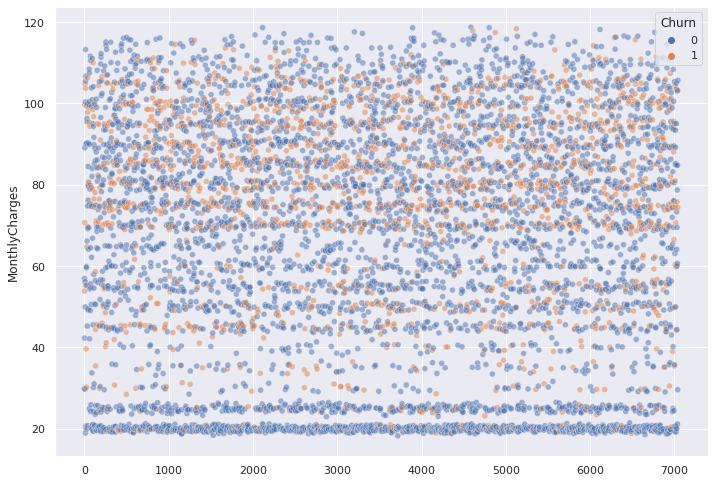

In [116]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=data, x=data.index, y='MonthlyCharges', hue='Churn', alpha=0.5)

Bands of churning can be observed here

<AxesSubplot:ylabel='TotalCharges'>

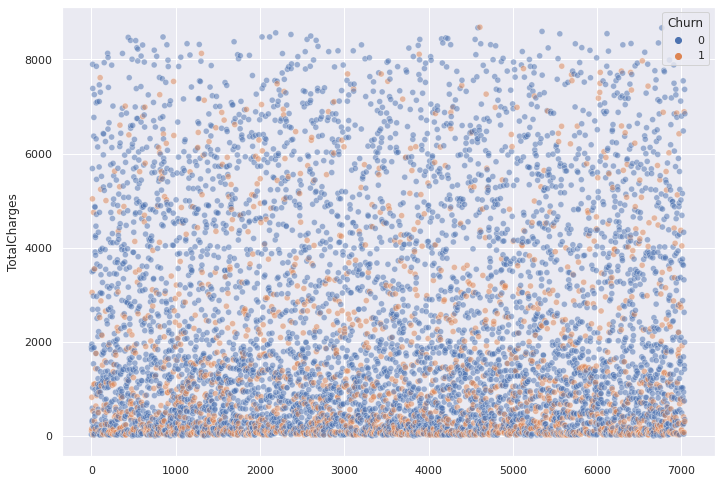

In [117]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=data, x=data.index, y='TotalCharges', hue='Churn', alpha=0.5)

In [118]:
for i in range(8000):
    threshold = i
    business_below = data[data.TotalCharges <= threshold].TotalCharges.sum()
    business_above = data[data.TotalCharges > threshold].TotalCharges.sum()
    if abs(business_below - business_above) < 10000:
        break

print('Total business due to customers having Total charges <=', threshold, '=', business_below)
print('Total business due to customers having Total charges >', threshold, '=', business_above)

Total business due to customers having Total charges <= 4736 = 8024013.4
Total business due to customers having Total charges > 4736 = 8032155.300000001


<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

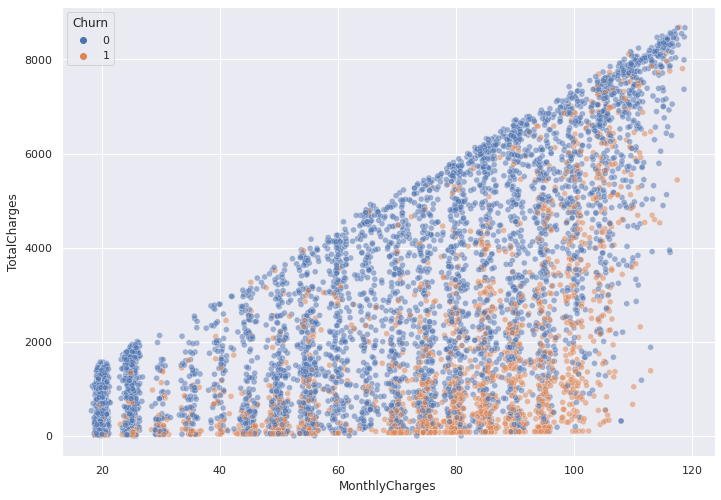

In [119]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=data, x='MonthlyCharges', y='TotalCharges', hue='Churn', alpha=0.5)

- There is a linear pattern betwen MonthlyCharges and TotalCharges. This is expected
- Vertical bands can be observed hinting that MonthlyCharges is a discrete variable and not a continuous variable
- Churning density in low MonthlyCharges and low TotalCharges is less

## Dummy variables

In [120]:
# We won't include column'MultipleLines' as it is now a numeric column
cols = ['Contract', 'PaymentMethod', 'InternetService']

# create dummy variables
dummy1 = pd.get_dummies(data[cols], drop_first=True)

# adding this to the main dataset
data = pd.concat([data, dummy1], axis=1)
data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,0,0,1,0,0,DSL,0,1,0,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.50,0,1,0,0,0,0,DSL,1,0,1,0,0,0,1,0,0,0,1,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,0,0,0,DSL,1,1,0,0,0,0,0,0,0,0,1,1,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0,0,0,DSL,1,0,1,1,0,0,1,0,0,0,0,1,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,0,0,0,0,0,Fiber optic,0,0,0,0,0,0,0,0,0,1,0,0,1


In [121]:
# dropping the original columns corresponding to the dummy columns created
data.drop(labels=cols, axis=1, inplace=True)
data.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


## Checking for Outliers

In [122]:
data.describe(percentiles=[.25, .5, .75, .9, .95, .99])

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,0.903166,0.592219,64.761692,2279.734304,0.265370,0.504756,0.162147,0.483033,0.299588,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.209144,0.240664,0.216101,0.335794,0.228880,0.343746,0.439585
std,24.559481,0.295752,0.491457,30.090047,2266.794470,0.441561,0.500013,0.368612,0.499748,0.458110,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.406726,0.427517,0.411613,0.472301,0.420141,0.474991,0.496372
min,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,1.000000,0.000000,35.500000,398.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,1.000000,1.000000,70.350000,1394.550000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,1.000000,1.000000,89.850000,3786.600000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
90%,69.000000,1.000000,1.000000,102.600000,5973.690000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
95%,72.000000,1.000000,1.000000,107.400000,6921.025000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
99%,72.000000,1.000000,1.000000,114.729000,8039.256000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


At all percentiles the value increase is gradual so there are no outliers

In [123]:
## Checking for Null values

In [124]:
data.isnull().sum()

customerID                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
MultipleLines                            0
OnlineSecurity                           0
OnlineBackup                             0
DeviceProtection                         0
TechSupport                              0
StreamingTV                              0
StreamingMovies                          0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
InternetSer

There are no null values

# Test Train Split

In [125]:
# Import necessary libraries
from sklearn.model_selection import train_test_split

- We don't need the column 'CustomerID' as it is not useful in prediction
- We will split the column 'Churn' as y (dependant variable) and rest of them as X (independant variable)

In [126]:
y = data['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [127]:
X = data.drop(['Churn','customerID'], axis=1)
X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic
0,1,0,1,29.85,29.85,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
1,34,1,0,56.95,1889.50,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0
2,2,1,1,53.85,108.15,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0
3,45,0,0,42.30,1840.75,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0
4,2,1,1,70.70,151.65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [128]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [129]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Columns 'tenure', 'MonthlyCharges', 'TotalCharges' have data of different proportiones which can cause unequal influences on the model. So, we standardise them

In [130]:
cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
X_train[cols] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])

X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic
877,0.754422,0,0,-0.145568,0.350963,0,0,0,1,0,1,0,1,1,1,1,1,0,0,0,0,1,0
5792,-0.710751,1,1,1.051796,-0.377957,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,1
5334,0.673024,1,1,1.437668,1.329866,0,0,1,1,1,0,1,1,1,1,1,0,1,0,0,0,0,1
878,1.120716,1,0,0.006794,0.776103,0,0,0,0,1,1,0,1,1,0,0,1,0,0,1,0,1,0
6578,-0.914247,1,0,0.298268,-0.701925,0,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0


## Checking Correlations

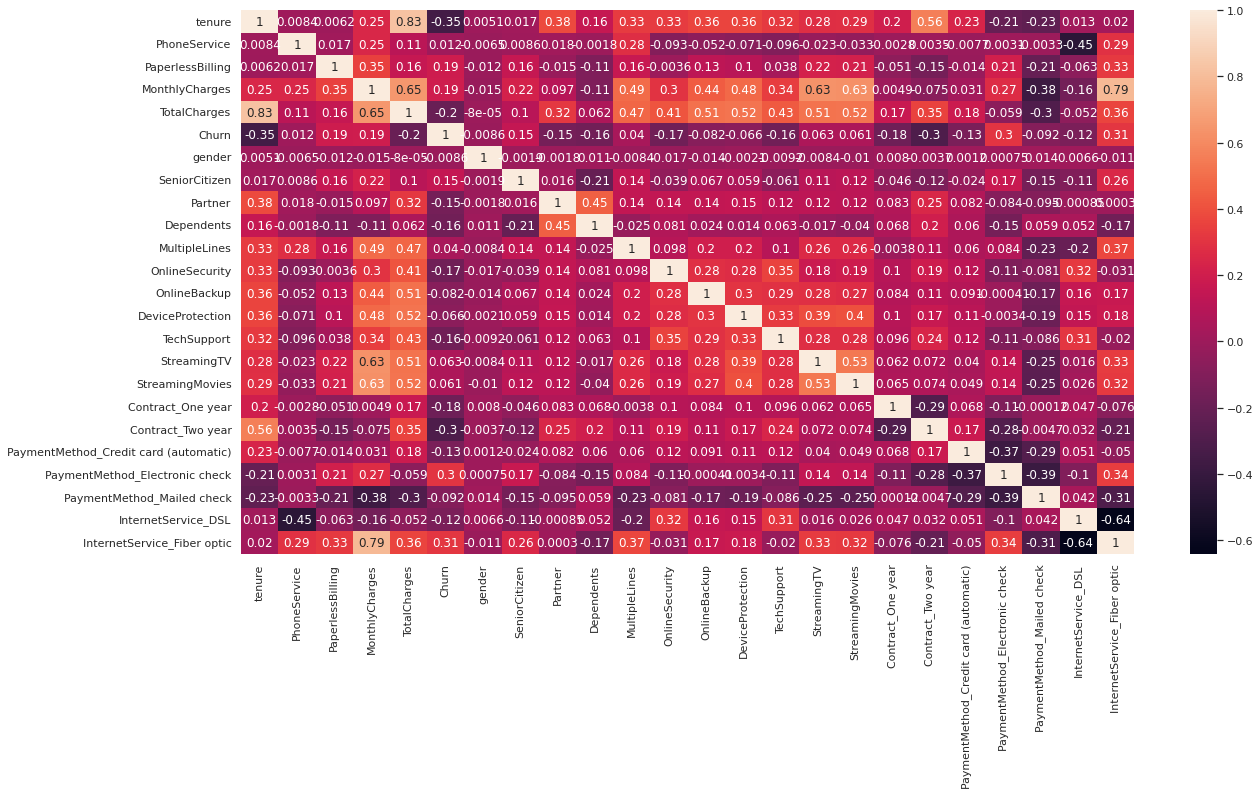

In [131]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(data.corr(),annot = True)
plt.show()

There are no big clusters of high correlations (>0.5 or < -0.5). So we will ignore for now and proceed further on. The big factors will be taken care of during VIF anyway ...

# Model building

In [132]:
# Imposrt necessary libraries
import statsmodels.api as sm

In [133]:
# Logistic regression model
# GLM is Generalised Linear Models
# Binomial family because the classification is binomial - Churn or Non-Churn
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2008.0
Date:                Thu, 21 Jul 2022   Deviance:                       4016.1
Time:                        14:59:25   Pearson chi2:                 5.77e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2885
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -5.1683      2.493     -2.073      0.038     -10.054      -0.282
tenure                                   -1.3441      0.179     -7.500      0.000      -1.695      -0.993
PhoneService                              0.4097      0.786      0.521      0.602      -1.131       1.950
PaperlessBilling                          0.3453      0.090      3.828      0.000       0.169       0.522
MonthlyCharges                           -1.5336      1.162     -1.320      0.187      -3.812       0.744
TotalCharges                              0.6103      0.190      3.215      0.001       0.238       0.982
gender                                   -0.0411      0.078     -0.525      0.600      -0.195       0.112
SeniorCitizen                             0.2950      0.103      2.877      0.004       0.094       0.496
Partner                                   0.0272      0.094      0.289      0.772      -0.157       0.212
Dependents                               -0.2207      0.108     -2.049      0.040      -0.432      -0.010
MultipleLines                             0.5539      0.215      2.577      0.010       0.133       0.975
OnlineSecurity                           -0.0429      0.217     -0.198      0.843      -0.467       0.382
OnlineBackup                             -0.0206      0.211     -0.097      0.922      -0.435       0.394
DeviceProtection                          0.2014      0.213      0.944      0.345      -0.217       0.620
TechSupport                              -0.2538      0.219     -1.159      0.247      -0.683       0.175
StreamingTV                               0.7001      0.397      1.764      0.078      -0.078       1.478
StreamingMovies                           0.6689      0.396      1.688      0.091      -0.108       1.445
Contract_One year                        -0.6736      0.129     -5.205      0.000      -0.927      -0.420
Contract_Two year                        -1.3372      0.207     -6.452      0.000      -1.743      -0.931
PaymentMethod_Credit card (automatic)    -0.1531      0.138     -1.108      0.268      -0.424       0.118
PaymentMethod_Electronic check            0.2733      0.114      2.396      0.017       0.050       0.497
PaymentMethod_Mailed check               -0.0916      0.139     -0.660      0.509      -0.364       0.180
InternetService_DSL                       2.1794      0.977      2.231      0.026       0.264       4.094
InternetService_Fiber optic               4.2015      1.930      2.177      0.029       0.419       7.984
=========================================================================================================
"""

The p>|z| needs to be as close to 0 as possible. Apparently there are many variables that have p>|z| close to 1. So there is a need for feature elimination

# Recursive Feature Elimination

In [134]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
logreg = LogisticRegression()

In [135]:
rfe = RFE(logreg, n_features_to_select=15)             # Finding 15 top features
rfe = rfe.fit(X_train, y_train)

In [136]:
rfe.support_

array([ True,  True,  True,  True,  True, False,  True, False, False,
        True,  True,  True, False,  True, False, False,  True,  True,
       False,  True, False,  True,  True])

In [137]:
rfe.ranking_

array([1, 1, 1, 1, 1, 8, 1, 9, 2, 1, 1, 1, 3, 1, 6, 7, 1, 1, 4, 1, 5, 1,
       1])

In [138]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('gender', False, 8),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 9),
 ('Dependents', False, 2),
 ('MultipleLines', True, 1),
 ('OnlineSecurity', True, 1),
 ('OnlineBackup', True, 1),
 ('DeviceProtection', False, 3),
 ('TechSupport', True, 1),
 ('StreamingTV', False, 6),
 ('StreamingMovies', False, 7),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', False, 4),
 ('PaymentMethod_Electronic check', True, 1),
 ('PaymentMethod_Mailed check', False, 5),
 ('InternetService_DSL', True, 1),
 ('InternetService_Fiber optic', True, 1)]

In [139]:
print('These are the columns that RFE feels to be significant')
cols = X_train.columns[rfe.support_]
cols

These are the columns that RFE feels to be significant


Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'SeniorCitizen', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'TechSupport', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InternetService_DSL',
       'InternetService_Fiber optic'],
      dtype='object')

# Iteration2 with StatsModel

In [140]:
X_train_sm = sm.add_constant(X_train[cols])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4914
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2013.4
Date:                Thu, 21 Jul 2022   Deviance:                       4026.7
Time:                        14:59:26   Pearson chi2:                 5.83e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2870
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.1953      0.381     -3.138      0.002      -1.942      -0.449
tenure                            -1.3454      0.176     -7.639      0.000      -1.691      -1.000
PhoneService                      -0.8813      0.179     -4.913      0.000      -1.233      -0.530
PaperlessBilling                   0.3623      0.090      4.038      0.000       0.186       0.538
MonthlyCharges                     0.4036      0.165      2.440      0.015       0.079       0.728
TotalCharges                       0.6046      0.188      3.208      0.001       0.235       0.974
SeniorCitizen                      0.3300      0.101      3.283      0.001       0.133       0.527
MultipleLines                      0.2363      0.099      2.380      0.017       0.042       0.431
OnlineSecurity                    -0.3684      0.103     -3.565      0.000      -0.571      -0.166
OnlineBackup                      -0.3406      0.095     -3.568      0.000      -0.528      -0.154
TechSupport                       -0.5774      0.109     -5.285      0.000      -0.792      -0.363
Contract_One year                 -0.6967      0.129     -5.409      0.000      -0.949      -0.444
Contract_Two year                 -1.3658      0.206     -6.616      0.000      -1.770      -0.961
PaymentMethod_Electronic check     0.3619      0.083      4.339      0.000       0.198       0.525
InternetService_DSL                0.5788      0.229      2.527      0.012       0.130       1.028
InternetService_Fiber optic        1.0172      0.338      3.008      0.003       0.354       1.680
==================================================================================================
"""

Now that everything looks satisfactory, let us go with predictions

# Predictions

In [141]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

# Reshaping to lose the index values
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.04227204, 0.45993782, 0.09399225, 0.0271777 , 0.12154661,
       0.46119626, 0.7428697 , 0.04231436, 0.70426688, 0.07369918])

In [142]:
# Create a dataframe with actual and predicted data
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['the_index'] = y_train.index


y_train_pred_final.head()

,Churn,Churn_Prob,the_index
0,0,0.042272,877
1,1,0.459938,5792
2,1,0.093992,5334
3,0,0.027178,878
4,0,0.121547,6578


In [143]:
y_train_pred_final['prediction'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head(10)

,Churn,Churn_Prob,the_index,prediction
0,0,0.042272,877,0
1,1,0.459938,5792,0
2,1,0.093992,5334,0
3,0,0.027178,878,0
4,0,0.121547,6578,0
5,1,0.461196,3090,0
6,1,0.742870,3043,1
7,0,0.042314,5028,0
8,1,0.704267,4463,1
9,1,0.073699,2822,0


# Metrics

In [144]:
# Import necessary libraries
from sklearn import metrics

### We don't go with percentage error because of class imbalance

## Confusion Matrix

In [145]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.prediction )
print(confusion)

[[3259  368]
 [ 552  751]]


In [146]:
#                 Confusion Matrix

#                       Actual
#              True              False
# P  T 
# r  r 
# e  u 
# d  e     True Positive   | False Positive
# i  ---------------------------------------- 
# c  F     False Negative  | True Negative
# t  a
# e  l
# d  s
#    e


In [147]:
# Let's check the overall accuracy:
# accuracy = correctly predicted labels / total labels = (TP + FN)/ (TP + FP + FN + TN)
print('Accuracy :')
acc = metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.prediction)
acc = round(acc*100, 2)
print(acc, '%')

Accuracy :
81.34 %


# Variance Inflation Factor (VIF)

In [148]:
# Import ncessary libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [149]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns

# THis method not working due to shallow copy
# for i in range(X_train[cols].shape[1]):
#     print(X_train[cols].columns[i])
#     z = variance_inflation_factor(X_train[cols].values, i)
#     print(z)
#     vif['VIF_me'] = z

vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,TotalCharges,10.30
14,InternetService_Fiber optic,8.90
1,PhoneService,7.67
0,tenure,6.82
3,MonthlyCharges,6.34
13,InternetService_DSL,3.45
11,Contract_Two year,3.10
2,PaperlessBilling,2.90
6,MultipleLines,2.58
9,TechSupport,2.25


Let us drop TotalCharges

In [150]:
cols = cols.drop('TotalCharges', 1)
cols

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'SeniorCitizen', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'TechSupport', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InternetService_DSL',
       'InternetService_Fiber optic'],
      dtype='object')

# Iteration3 with StatsModel

In [151]:
X_train_sm = sm.add_constant(X_train[cols])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

# Reshaping to lose the index values
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

# Create a dataframe with actual and predicted data
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['the_index'] = y_train.index


y_train_pred_final.head()

y_train_pred_final['prediction'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head(10)

print('Accuracy :')
acc = metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.prediction)
acc = round(acc*100, 2)
print(acc, '%')



Accuracy :
80.83 %


Clearly, the accuracy did not take a big hit. So, it is OK

In [152]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns

# THis method not working due to shallow copy
# for i in range(X_train[cols].shape[1]):
#     print(X_train[cols].columns[i])
#     z = variance_inflation_factor(X_train[cols].values, i)
#     print(z)
#     vif['VIF_me'] = z

vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,InternetService_Fiber optic,8.78
1,PhoneService,7.67
3,MonthlyCharges,3.93
12,InternetService_DSL,3.37
10,Contract_Two year,3.10
2,PaperlessBilling,2.90
5,MultipleLines,2.58
0,tenure,2.52
8,TechSupport,2.21
7,OnlineBackup,2.18


In [153]:
cols = cols.drop('InternetService_Fiber optic', 1)
cols

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'SeniorCitizen', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'TechSupport', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InternetService_DSL'],
      dtype='object')

# Iteration4 with StatsModel

In [154]:
X_train_sm = sm.add_constant(X_train[cols])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

# Reshaping to lose the index values
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

# Create a dataframe with actual and predicted data
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['the_index'] = y_train.index


y_train_pred_final.head()

y_train_pred_final['prediction'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head(10)

print('Accuracy :')
acc = metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.prediction)
acc = round(acc*100, 2)
print(acc, '%')

Accuracy :
80.71 %


Clearly, the accuracy did not take a big hit. So, it is OK

In [155]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns

# THis method not working due to shallow copy
# for i in range(X_train[cols].shape[1]):
#     print(X_train[cols].columns[i])
#     z = variance_inflation_factor(X_train[cols].values, i)
#     print(z)
#     vif['VIF_me'] = z

vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,PhoneService,5.33
10,Contract_Two year,3.09
2,PaperlessBilling,2.63
5,MultipleLines,2.58
0,tenure,2.40
3,MonthlyCharges,2.29
12,InternetService_DSL,2.27
8,TechSupport,2.21
7,OnlineBackup,2.16
6,OnlineSecurity,2.04


In [156]:
cols = cols.drop('PhoneService', 1)
cols

Index(['tenure', 'PaperlessBilling', 'MonthlyCharges', 'SeniorCitizen',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'TechSupport',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InternetService_DSL'],
      dtype='object')

# Iteration5 with StatsModel

In [157]:
X_train_sm = sm.add_constant(X_train[cols])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

# Reshaping to lose the index values
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

# Create a dataframe with actual and predicted data
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['the_index'] = y_train.index


y_train_pred_final.head()

y_train_pred_final['prediction'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head(10)

print('Accuracy :')
acc = metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.prediction)
acc = round(acc*100, 2)
print(acc, '%')

Accuracy :
80.87 %


The accuracy did not take a big hit. So, it is OK

In [158]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns

# THis method not working due to shallow copy
# for i in range(X_train[cols].shape[1]):
#     print(X_train[cols].columns[i])
#     z = variance_inflation_factor(X_train[cols].values, i)
#     print(z)
#     vif['VIF_me'] = z

vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Contract_Two year,2.53
1,PaperlessBilling,2.29
11,InternetService_DSL,2.21
2,MonthlyCharges,2.19
7,TechSupport,2.18
4,MultipleLines,2.10
6,OnlineBackup,2.10
5,OnlineSecurity,2.00
0,tenure,1.95
10,PaymentMethod_Electronic check,1.70


All VIF are below 3, so this is an acceptable model

In [159]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.prediction )
print(confusion)
tn, fp, fn, tp = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.prediction ).ravel()
print(tn, fp, fn, tp)


#                 Confusion Matrix

#                     Predicted
#              False              True
#    F
#    a 
# A  l 
# c  s 
# t  e     True Negative   |   False Positive
#    ---------------------------------------- 
# u  T     False Negative  |   True Positive
# a  r
# l  u
#    e
#    



[[3267  360]
 [ 583  720]]
3267 360 583 720


Are we concerned about True predictions ?

In [160]:
# Sensitivity
# sensitivity = Trues that are correctly predicted / Total Trues 
sensitivity = tp / (tp + fn)
print('Sensitivity : ', round(sensitivity*100, 2), '%')

Sensitivity :  55.26 %


Are we concerned about False predictions ?

In [161]:
# Specificity
# Specificity = Falses that are correctly predicted / Total Falses
specificity = tn / (tn + fp)
print('Specificity : ', round(specificity*100, 2), '%')

Specificity :  90.07 %


This may be concerning to us :

We are under-estimating the churn cases and over-estimating the non-churn cases

# Finding Optimal Cut-Off point

In [162]:
# Let's create columns with different probability cutoffs 
numbers = [i/100 for i in range(0,101, 5)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,the_index,prediction,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0
0,0,0.026667,877,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.491507,5792,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0.076346,5334,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.038487,878,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.145008,6578,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [163]:
# numbers = [i/100 for i in range(0,101, 5)]
# numbers

In [164]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = numbers
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.00  0.00  0.264300  1.000000  0.000000
0.05  0.05  0.517039  0.976209  0.352082
0.10  0.10  0.608925  0.935533  0.491591
0.15  0.15  0.665720  0.908672  0.578439
0.20  0.20  0.716836  0.851880  0.668321
0.25  0.25  0.747667  0.815810  0.723187
0.30  0.30  0.765720  0.762855  0.766749
0.35  0.35  0.785801  0.716807  0.810587
0.40  0.40  0.797160  0.665388  0.844500
0.45  0.45  0.803854  0.615503  0.871519
0.50  0.50  0.808722  0.552571  0.900744
0.55  0.55  0.803448  0.470453  0.923077
0.60  0.60  0.797363  0.382195  0.946512
0.65  0.65  0.788235  0.295472  0.965261
0.70  0.70  0.776268  0.207214  0.980700
0.75  0.75  0.758621  0.112817  0.990626
0.80  0.80  0.745436  0.046048  0.996691
0.85  0.85  0.738540  0.011512  0.999724
0.90  0.90  0.735700  0.000000  1.000000
0.95  0.95  0.735700  0.000000  1.000000
1.00  1.00  0.735700  0.000000  1.000000


The best cut-off is 0.3

# Iteration6 The final iteration

In [165]:
X_train_sm = sm.add_constant(X_train[cols])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

# Reshaping to lose the index values
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

# Create a dataframe with actual and predicted data
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['the_index'] = y_train.index


y_train_pred_final.head()

y_train_pred_final['prediction'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head(10)

print('Accuracy :')
acc = metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.prediction)
acc = round(acc*100, 2)
print(acc, '%')

confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.prediction )
print('Confusion Matrix')
print(confusion)

Accuracy :
76.57 %
Confusion Matrix
[[2781  846]
 [ 309  994]]


In [166]:
tn, fp, fn, tp = confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.prediction ).ravel()

sensitivity = tp / (tp + fn)
print('Sensitivity : ', round(sensitivity*100, 2), '%')

specificity = tn / (tn + fp)
print('Specificity : ', round(specificity*100, 2), '%')

Sensitivity :  76.29 %
Specificity :  76.67 %


# Making Predictions on Test Case

In [167]:
X_test.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic
4880,50,1,0,20.55,1067.65,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1541,72,1,0,19.85,1434.10,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1289,63,1,0,68.80,4111.35,1,0,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0
5745,61,1,1,24.20,1445.20,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0
4873,7,1,0,19.30,144.95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [168]:
y_test.head()

4880    0
1541    0
1289    0
5745    0
4873    0
Name: Churn, dtype: int64

'tenure', 'MonthlyCharges' and 'TotalCharges' need to be scaled because they were scaled during training

In [169]:
X_test[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.transform(X_test[['tenure', 'MonthlyCharges', 'TotalCharges']])
X_test.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic
4880,0.713723,1,0,-1.457203,-0.536573,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1541,1.609107,1,0,-1.480388,-0.374711,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1289,1.242814,1,0,0.140938,0.807839,1,0,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0
5745,1.161415,1,1,-1.336307,-0.369808,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0
4873,-1.036345,1,0,-1.498605,-0.944133,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [170]:
# Removing unwanted columns
X_test = X_test[cols]


In [171]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head(10)

,const,tenure,PaperlessBilling,MonthlyCharges,SeniorCitizen,MultipleLines,OnlineSecurity,OnlineBackup,TechSupport,Contract_One year,Contract_Two year,PaymentMethod_Electronic check,InternetService_DSL
4880,1.0,0.713723,0,-1.457203,0,0,0,0,0,0,1,0,0
1541,1.0,1.609107,0,-1.480388,0,0,0,0,0,0,1,0,0
1289,1.0,1.242814,0,0.140938,0,1,1,1,1,1,0,0,1
5745,1.0,1.161415,1,-1.336307,0,1,0,0,0,0,1,0,0
4873,1.0,-1.036345,0,-1.498605,0,0,0,0,0,0,0,0,0
4168,1.0,1.161415,1,-0.079324,0,0,1,0,1,0,1,0,1
1557,1.0,-0.832849,1,0.089599,0,1,1,1,1,0,0,1,1
2892,1.0,-1.280541,0,-1.460515,0,0,0,0,0,0,0,0,0
664,1.0,0.998618,0,-1.491981,0,0,0,0,0,0,1,0,0
1588,1.0,0.713723,1,1.399578,1,1,0,1,1,1,0,1,0


In [172]:
y_test_pred = res.predict(X_test_sm)
y_test_pred.head()

4880    0.010738
1541    0.005194
1289    0.018975
5745    0.014021
4873    0.156611
dtype: float64

In [173]:
final_df = pd.DataFrame(zip(y_test.index, y_test, round(y_test_pred,2), y_test_pred.map(lambda x: 1 if x > 0.3 else 0)))
final_df = final_df.rename(columns={0:'Sl. No.', 1:'Actual Churn', 2:'Churn_Probability', 3:'Predicted Churn'})
final_df.head(20)

,Sl. No.,Actual Churn,Churn_Probability,Predicted Churn
0,4880,0,0.01,0
1,1541,0,0.01,0
2,1289,0,0.02,0
3,5745,0,0.01,0
4,4873,0,0.16,0
5,4168,0,0.02,0
6,1557,0,0.33,1
7,2892,0,0.19,0
8,664,0,0.01,0
9,1588,0,0.26,0


In [174]:
print('Accuracy :')
acc = metrics.accuracy_score(final_df['Actual Churn'], final_df['Predicted Churn'])
acc = round(acc*100, 2)
print(acc, '%')

confusion = metrics.confusion_matrix(final_df['Actual Churn'], final_df['Predicted Churn'])
print('Confusion Matrix')
print(confusion)

Accuracy :
73.54 %
Confusion Matrix
[[1134  413]
 [ 146  420]]


In [175]:
tn, fp, fn, tp = metrics.confusion_matrix(final_df['Actual Churn'], final_df['Predicted Churn']).ravel()

sensitivity = tp / (tp + fn)
print('Sensitivity : ', round(sensitivity*100, 2), '%')

specificity = tn / (tn + fp)
print('Specificity : ', round(specificity*100, 2), '%')

Sensitivity :  74.2 %
Specificity :  73.3 %
